In [56]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [57]:

gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')
tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')
#tracks = Tracks.from_mot('./OUTPUT/deepsort_tracking_output_4.txt')
#tracks = Tracks.from_mot('./OUTPUT/results_2_deepocsort.txt')

#gt_tracks = Tracks.from_mot('./DATA/output_4_gt_deepocsort.txt')
#tracks = Tracks.from_mot('./OUTPUT/results_deepocsort.txt')
#tracks = Tracks.from_mot('./OUTPUT/results_preds_deepocsort.txt')
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman_10000.txt')

eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [58]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [59]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.66  0.22      2219      2551     1
----------
IDs
        IDTP  IDFP  IDFN   IDP   IDR  IDF1
values  3561  2237  2569  0.61  0.58   0.6
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.47  0.46  0.49  0.69


In [60]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       2.96e-03       3.35e-04           0.03           0.96
0.10       1.13e-02       3.45e-03           0.04           0.92
0.15       2.64e-02       1.26e-02           0.06           0.89
0.20       4.58e-02       3.08e-02           0.07           0.85
0.25       8.34e-02       6.43e-02           0.11           0.81
0.30       1.30e-01       1.09e-01           0.15           0.78
0.35       1.95e-01       1.72e-01           0.22           0.74
0.40       2.75e-01       2.49e-01           0.30           0.71
0.45       3.64e-01       3.35e-01           0.40           0.68
0.50       4.56e-01       4.29e-01           0.49           0.66
0.55       5.49e-01       5.25e-01           0.57           0.63
0.60       6.47e-01       6.26e-01           0.67           0.61
0.65       7.33e-01       7.17e-01           0.75           0.59
0.70       8.10e-01       8.00e-01           0.82           0.58
0.7

(0.0, 1.0)

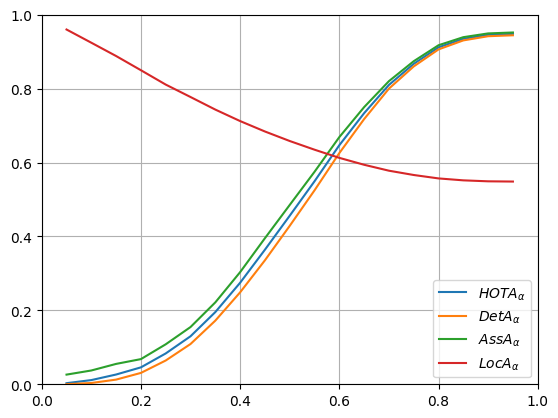

In [61]:
fig = hota_alpha.plot.line()
fig.grid(True)
fig.set_xlim(0, 1)
fig.set_ylim(0, 1)